## Kaggle分數
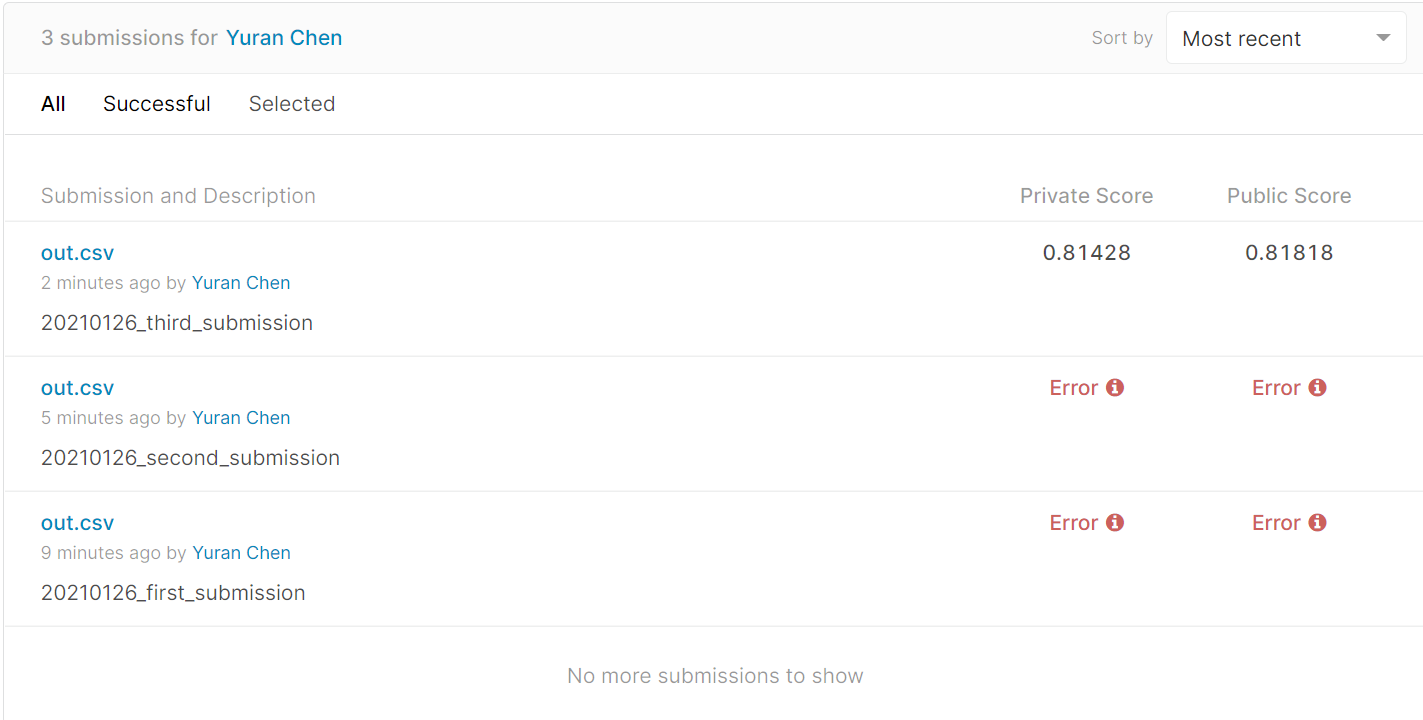

In [1]:
import pandas as pd
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
import numpy as np


In [2]:
path = './data/'
train = pd.read_csv(path+'train.csv', header=None)
train.shape

(1000, 40)

In [3]:
path = './data/'
label = pd.read_csv(path+'trainLabels.csv', header=None)
label.shape

(1000, 1)

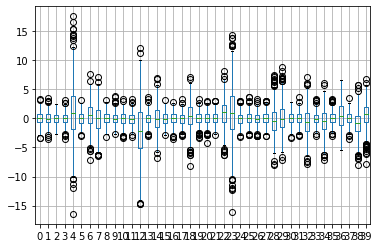

In [4]:
train.boxplot()

In [5]:
scaler = MinMaxScaler()
train = pd.DataFrame(scaler.fit_transform(train))
train

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,0.547689,0.320163,0.800065,0.348793,0.638821,0.528876,0.649860,0.594141,0.491822,0.511760,...,0.406288,0.352617,0.400488,0.518257,0.813164,0.575869,0.726477,0.108858,0.388353,0.540991
1,0.327488,0.540456,0.695430,0.332123,0.547881,0.470356,0.458765,0.669273,0.378280,0.398251,...,0.411223,0.447978,0.658593,0.545890,0.503160,0.529535,0.518918,0.672814,0.682393,0.409594
2,0.681106,0.434954,0.527012,0.187336,0.590833,0.509461,0.501315,0.167901,0.311670,0.226338,...,0.445806,0.558805,0.298666,0.607026,0.333030,0.214913,0.590963,0.592891,0.514923,0.738648
3,0.738047,0.411502,0.348957,0.436184,0.575146,0.636623,0.476653,0.807142,0.665146,0.248469,...,0.707288,0.637725,0.290694,0.304463,0.706572,0.708607,0.681780,0.529632,0.627185,0.663044
4,0.411336,0.402473,0.726456,0.523433,0.585868,0.493033,0.585006,0.162679,0.220047,0.533414,...,0.625499,0.175345,0.557251,0.439863,0.181230,0.224755,0.604102,0.623657,0.445334,0.562034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.456560,0.610362,0.332568,0.645776,0.538420,0.709915,0.618823,0.564587,0.479723,0.422949,...,0.446464,0.388537,0.572384,0.362175,0.334668,0.395552,0.483182,0.644948,0.389048,0.513861
996,0.225918,0.528383,0.601957,0.211660,0.706769,0.472457,0.183761,0.523471,0.247193,0.245435,...,0.601051,0.482219,0.465607,0.460726,0.318982,0.554655,0.235477,0.503929,0.785560,0.836239
997,0.639343,0.248454,0.314485,0.561601,0.879145,0.521467,0.335702,0.639719,0.439887,0.508593,...,0.735074,0.284918,0.339073,0.757796,0.223459,0.288081,0.278052,0.507492,0.647140,0.589792
998,0.867533,0.389569,0.342072,0.736808,0.176290,0.355518,0.668890,0.498646,0.593080,0.280819,...,0.906416,0.440240,0.574269,0.327945,0.740974,0.361292,0.168267,0.531642,0.415210,0.299723


In [6]:
'''
預設參數
'''
# 切分訓練集/測試集
x_train, x_test, y_train, y_test = train_test_split(train, label, test_size=0.20, random_state=7)

# 建立模型
GBC = GradientBoostingClassifier(random_state=7)

GBC.fit(x_train, y_train)
y_pred = GBC.predict(x_test)
print(metrics.accuracy_score(y_test, y_pred))



D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.86


In [7]:
'''
GridSearchCV
'''
GBC_G = GradientBoostingClassifier(random_state=7)

# 設定要訓練的超參數組合
n_estimators = [100, 300]
max_depth = [ 3, 5]
learning_rate = [0.1, 0.5]
min_samples_leaf = [5, 10, 15]

param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, min_samples_leaf=min_samples_leaf)

## 建立搜尋物件，放入模型及參數組合字典 (n_jobs=-1 會使用全部 cpu 平行運算)
grid_search = GridSearchCV(GBC_G, param_grid, scoring='accuracy',  verbose=5)

# 開始搜尋最佳參數
grid_result = grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=100, score=0.806, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s
D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=100, score=0.887, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=100 


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.8s remaining:    0.0s
D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=100, score=0.844, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=100 


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.3s remaining:    0.0s
D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=100, score=0.856, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=100 


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.8s remaining:    0.0s
D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=100, score=0.856, total=   0.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.806, total=   1.4s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.894, total=   1.4s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.850, total=   1.4s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.875, total=   1.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.869, total=   1.5s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, score=0.806, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, score=0.869, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, score=0.869, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, score=0.875, total=   0.7s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=100, score=0.856, total=   0.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=300, score=0.825, total=   2.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=300, score=0.887, total=   2.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=300, score=0.850, total=   2.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=300, score=0.869, total=   2.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=10, n_estimators=300, score=0.850, total=   2.1s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=100, score=0.800, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=100, score=0.887, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=100, score=0.869, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=100, score=0.875, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=100, score=0.863, total=   0.6s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=300, score=0.800, total=   1.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=300, score=0.887, total=   2.0s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=300, score=0.844, total=   1.8s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=300, score=0.900, total=   1.9s
[CV] learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=3, min_samples_leaf=15, n_estimators=300, score=0.869, total=   1.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=100, score=0.806, total=   1.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=100, score=0.887, total=   1.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=100, score=0.856, total=   0.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=100, score=0.881, total=   1.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=100, score=0.850, total=   0.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=300, score=0.825, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=300, score=0.900, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=300, score=0.856, total=   2.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=300, score=0.881, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=5, n_estimators=300, score=0.863, total=   1.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=100, score=0.844, total=   0.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=100, score=0.881, total=   0.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=100, score=0.875, total=   0.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=100, score=0.894, total=   0.9s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=100, score=0.869, total=   1.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=300, score=0.844, total=   2.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=300, score=0.912, total=   3.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=300, score=0.887, total=   3.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=300, score=0.887, total=   2.8s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=10, n_estimators=300, score=0.863, total=   2.7s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=100, score=0.825, total=   1.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=100, score=0.875, total=   1.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=100, score=0.863, total=   1.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=100, score=0.900, total=   1.1s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=100, score=0.856, total=   1.0s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=300, score=0.844, total=   2.2s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=300, score=0.900, total=   2.5s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=300, score=0.875, total=   2.3s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=300, score=0.900, total=   2.6s
[CV] learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.1, max_depth=5, min_samples_leaf=15, n_estimators=300, score=0.869, total=   2.2s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=100, score=0.806, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=100, score=0.881, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=100, score=0.838, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=100, score=0.887, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=100, score=0.850, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.794, total=   1.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.894, total=   1.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.838, total=   0.9s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.869, total=   1.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=5, n_estimators=300, score=0.856, total=   1.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=100, score=0.819, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=100, score=0.881, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=100, score=0.856, total=   0.6s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=100, score=0.838, total=   0.7s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=100, score=0.856, total=   0.6s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=300, score=0.825, total=   1.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=300, score=0.894, total=   1.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=300, score=0.856, total=   0.9s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=300, score=0.863, total=   0.9s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=10, n_estimators=300, score=0.863, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=100, score=0.844, total=   0.6s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=100, score=0.863, total=   0.6s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=100, score=0.825, total=   0.6s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=100, score=0.875, total=   0.6s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=100, score=0.838, total=   0.6s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=300, score=0.844, total=   0.8s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=300, score=0.881, total=   0.9s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=300, score=0.831, total=   0.9s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=300, score=0.906, total=   1.0s
[CV] learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=3, min_samples_leaf=15, n_estimators=300, score=0.869, total=   0.9s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=100, score=0.806, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=100, score=0.887, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=100, score=0.875, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=100, score=0.900, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=100, score=0.875, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=300, score=0.806, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=300, score=0.887, total=   0.6s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=300, score=0.875, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=300, score=0.900, total=   0.6s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=5, n_estimators=300, score=0.875, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=100, score=0.819, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=100, score=0.938, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=100, score=0.869, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=100, score=0.894, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=100, score=0.856, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=300, score=0.819, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=300, score=0.938, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=300, score=0.869, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=300, score=0.894, total=   0.5s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=10, n_estimators=300, score=0.856, total=   0.6s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=100, score=0.819, total=   0.7s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=100, score=0.900, total=   0.8s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=100, score=0.844, total=   1.0s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=100, score=0.875, total=   1.0s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=100 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=100, score=0.881, total=   1.0s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=300, score=0.819, total=   1.2s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=300, score=0.900, total=   1.1s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=300, score=0.844, total=   1.0s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=300, score=0.875, total=   1.0s
[CV] learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=300 


D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[CV]  learning_rate=0.5, max_depth=5, min_samples_leaf=15, n_estimators=300, score=0.881, total=   1.0s


[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:  2.2min finished
D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [8]:
grid_result

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_n...ge=None,
         

In [9]:
# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

Best Accuracy: 0.878750 using {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 300}


In [10]:
# 使用最佳參數重新建立模型
GBC_bestparam = GradientBoostingClassifier(max_depth=grid_result.best_params_['max_depth'],
                                           n_estimators=grid_result.best_params_['n_estimators'],
                                          min_samples_leaf=grid_result.best_params_['min_samples_leaf'],
                                          learning_rate=grid_result.best_params_['learning_rate'])

# 訓練模型
GBC_bestparam.fit(x_train, y_train)

# 預測測試集
y_pred = GBC_bestparam.predict(x_test)
# 印出最佳結果與最佳參數
print("Best Accuracy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

D:\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:1454: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Best Accuracy: 0.878750 using {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 300}


In [11]:
'''
讀取測試集
'''
path = './data/'
test = pd.read_csv(path+'test.csv', header=None)
test.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,2.808909,-0.242894,-0.546421,0.255162,1.749736,-0.030458,-1.322071,3.578071,-0.667578,-0.884257,...,-0.261688,-0.224375,-1.675606,-0.479584,-0.244388,-0.672355,0.517860,0.010665,-0.419214,2.818387
1,-0.374101,0.537669,0.081063,0.756773,0.915231,2.557282,3.703187,1.673835,-0.764122,-1.228040,...,-0.969463,0.574154,-2.200519,-1.612240,0.179031,-2.924596,0.643610,-1.470939,-0.067408,-0.976265
2,-0.088370,0.154743,0.380716,-1.176126,1.699867,-0.258627,-1.384999,1.093584,1.596633,0.230631,...,-0.769885,-0.005143,1.467490,0.483803,-3.542981,0.814561,-1.652948,1.265866,-1.749248,1.773784
3,-0.685635,0.501283,1.873375,0.215224,-3.983468,-0.103637,4.136113,-0.225431,-1.515015,-1.071763,...,0.968609,2.386412,-0.131219,0.285646,2.302069,1.255588,-1.563090,-0.125258,-1.030761,-2.945329
4,0.350867,0.721897,-0.477104,-1.748776,-2.627405,1.075433,4.954253,-3.293501,-0.760369,0.204360,...,0.260553,-2.045650,-2.173227,0.372992,0.450700,-0.211657,1.301359,-0.522164,2.484883,0.039213


In [12]:
pred = pd.DataFrame(GBC_bestparam.predict(test))
pred = pred.reset_index()

In [13]:
pred.columns=['Id','Solution']

In [14]:
pred['Id'] = pred['Id'].apply(lambda x:x+1)
pred

,Id,Solution
0,1,1
1,2,0
2,3,0
3,4,0
4,5,0
...,...,...
8995,8996,0
8996,8997,1
8997,8998,1
8998,8999,0


In [15]:
pred.to_csv('out.csv', index=False)